In [2]:
import pymysql
import pickle

conn = pymysql.connect(host='rm-8vbwj6507z6465505ro.mysql.zhangbei.rds.aliyuncs.com', port=3306, user='root', passwd='AI@2019@ai', db='stu_db')
cur = conn.cursor(cursor=pymysql.cursors.DictCursor)
cur.execute('select * from news_chinese')
news = cur.fetchall()

with open(r'news.pk', 'wb') as f:
    pickle.dump(news, f)

In [4]:
import pandas as pd
data = pd.DataFrame(news)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89611 entries, 0 to 89610
Data columns (total 7 columns):
author     89611 non-null object
content    89611 non-null object
feature    89611 non-null object
id         89611 non-null int64
source     89611 non-null object
title      89611 non-null object
url        89611 non-null object
dtypes: int64(1), object(6)
memory usage: 4.8+ MB


In [6]:
data.head()

,author,content,feature,id,source,title,url
0,王子江 张寒,新华社德国杜塞尔多夫６月６日电题：乒乓女球迷 \n 新华社记者王子江、张寒\n 熊老...,"{""type"":""体育"",""site"":""新华社"",""url"":""http://home.x...",1,新华社,（体育）题：乒乓女球迷,http://home.xinhua-news.com/gdsd
1,夏文辉,\n\n2017年5月25日，在美国马萨诸塞州剑桥市，哈佛大学毕业生在毕业典礼上欢呼。（新华...,"{""type"":""其它"",""site"":""新华社"",""url"":""http://home.x...",2,新华社,哈佛大学为何取消这些新生入选资格？,http://home.xinhua-news.com/gdsd
2,张旌,\n\n2017年5月29日，在法国巴黎郊外的凡尔赛宫，法国总统马克龙出席新闻发布会。（新华...,"{""type"":""其它"",""site"":""新华社"",""url"":""http://home.x...",3,新华社,法国议会选举 马克龙有望获“压倒性胜利”,http://home.xinhua-news.com/gdsd
3,王衡,新华社兰州6月3日电（王衡、徐丹）记者从甘肃省交通运输厅获悉，甘肃近日集中开建高速公路、普通...,"{""type"":""宏观经济"",""site"":""新华社"",""url"":""http://home...",4,新华社,（经济）甘肃集中开工35个重点交通建设项目,http://home.xinhua-news.com/gdsd
4,邹峥,新华社照片，多伦多，2017年6月7日\n（体育）（2）冰球——国家女子冰球队海外选秀在多伦...,"{""type"":""冰球"",""site"":""新华社"",""url"":""http://home.x...",5,新华社,（体育）（2）冰球——国家女子冰球队海外选秀在多伦多展开,http://home.xinhua-news.com/gdsd


In [9]:
data = data.drop_duplicates(subset=['content'])

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74918 entries, 0 to 89610
Data columns (total 7 columns):
author     74918 non-null object
content    74918 non-null object
feature    74918 non-null object
id         74918 non-null int64
source     74918 non-null object
title      74918 non-null object
url        74918 non-null object
dtypes: int64(1), object(6)
memory usage: 4.6+ MB


In [12]:
def cut(string):
    import jieba
    return ' '.join(jieba.cut(string))

def token(string):
    import re
    return re.findall(r'[\w]+', string)

In [20]:
news_content = [cut(''.join(token(feature + title + content)))for content, feature, title in zip(data['content'], data['feature'], data['title'])]

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\RYANWU~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.657 seconds.
Prefix dict has been built succesfully.


In [24]:
news_content[0]

'type 体育 site 新华社 urlhttphomexinhuanewscomgdsdetailxhsnew2203534pageflaginitimageOrVedioTypeGdsIdsite _ signxinhuakeywords 乒乓球 summary 新华社 德国 杜塞尔多夫 ６ 月 ６ 日电 题 乒乓 女球迷 新华社 记者 王子江 张寒熊 老师 离开 上海 前 特意 花 一千多元 买 了 一只 张继科 代言 的 球拍 准备 在 世界 锦标赛 期间 他 体育 题 乒乓 女球迷 新华社 德国 杜塞尔多夫 ６ 月 ６ 日电 题 乒乓 女球迷 n 新华社 记者 王子江 张寒 n 熊 老师 离开 上海 前 特意 花 一千多元 买 了 一只 张继科 代言 的 球拍 准备 在 世界 锦标赛 期间 他 赢 了 比赛 后能 在 球拍 上 签个 名 但 没想到 张继科 在 ３ ２ 强赛 中 输给 了 韩国 的 李尚洙 n 拍子 算是 白 拿 过来 了 熊 老师 摇头 就算 是 信仰 充值 了 n 信仰 充值 是 乒乓球 粉丝 圈 非常 流行 的 词汇 简单 来说 就是 为 自己 喜欢 的 明星 或 球队 花钱 n 熊 老师 是 这位 ２ ２ 岁 的 成都 姑娘 的 艺名 艺名 这一 称呼 也 是 她们 自己 形容 的 熊 老师 的 真实 身份 是 上海 一所 名牌大学 会计专业 的 大四 学生 其他同学 正在 抓紧 毕业 找 工作 她 一个 人溜到 德国 观看 世乒赛 尽管 带 着 张继科 的 球拍 但 熊 老师 并 不是 张 的 铁粉 她 并 不 喜欢 张继科输 了 比赛 之后 一堆 科迷 在 赛场 外 抱头痛哭 的 场景 而 显得 比较 理智 但是 因为 科迷 数量 众多 让 她 这种 散户 也 有些 说不出 的 羡慕 n 他们 竟然 连续 两天 买断 了 一面 看 台上 所有 的 门票 为的是 挂 起 带有 张继科 名字 的 旗子 两天 就要 花 ４ ５ 万 人民币 熊 老师 直喊 过分 n 熊 老师 与 其他 １ ０ 名 中国队 女球迷 挤 在 一套 三居室 里 厨房 的 柜子 里 塞 了 很多 方便面 至少 三个 人挤 在 一个 房间 里 条件 的确 差 了 点 但 住宿费 平摊 下来 每天 只有 大约 ２ ０ ０ 元 人民币 这样 让 大家 心里 平衡 

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorized = TfidfVectorizer()
X = vectorized.fit_transform(news_content)

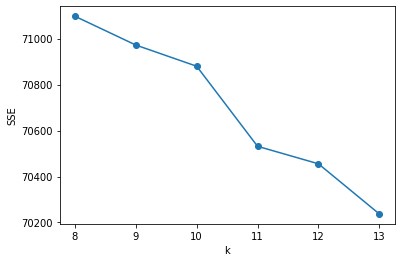

In [28]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
SSE = []  # 存放每次结果的误差平方和
for k in range(8,14):
    estimator = KMeans(n_clusters=k)  # 构造聚类器
    estimator.fit(X)
    SSE.append(estimator.inertia_)# estimator.inertia_代表聚类中心均值向量的总和
x = range(8,14)
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(x,SSE,'o-')
plt.show()

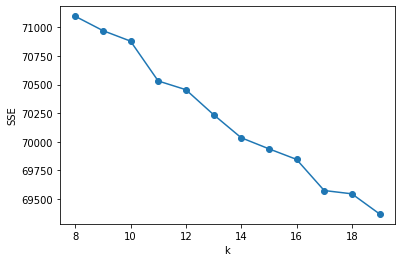

In [33]:
for k in range(14,20):
    estimator = KMeans(n_clusters=k)  # 构造聚类器
    estimator.fit(X)
    SSE.append(estimator.inertia_)
x = range(8,20)
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(x,SSE,'o-')
plt.show()

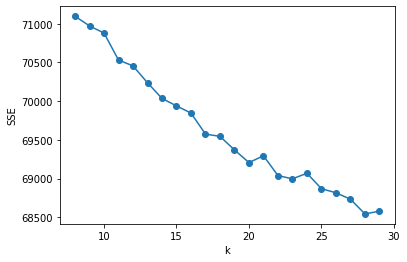

In [34]:
for k in range(20,30):
    estimator = KMeans(n_clusters=k)  # 构造聚类器
    estimator.fit(X)
    SSE.append(estimator.inertia_)
x = range(8,30)
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(x,SSE,'o-')
plt.show()

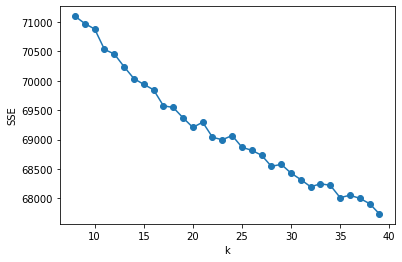

In [35]:
for k in range(30,40):
    estimator = KMeans(n_clusters=k)  # 构造聚类器
    estimator.fit(X)
    SSE.append(estimator.inertia_)
x = range(8,40)
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(x,SSE,'o-')
plt.show()

In [41]:
vectorized = TfidfVectorizer()
X = vectorized.fit_transform(['我们 热爱 篮球', '我们 不放弃 篮球'])

In [42]:
vectorized.get_feature_names()

['不放弃', '我们', '热爱', '篮球']

In [43]:
X.toarray()

array([[0.        , 0.50154891, 0.70490949, 0.50154891],
       [0.70490949, 0.50154891, 0.        , 0.50154891]])

In [45]:
vectorized.vocabulary_

{'我们': 1, '热爱': 2, '篮球': 3, '不放弃': 0}